# Task: Restaurant Recommendation

## Goal:
Create a restaurant recommendation system based on user preferences.

## Steps:
<ol type = '1'>
    <li>Preprocess the dataset by handling missing values and encoding categorical variables.</li>
    <li>Determine the criteria for restaurant recommendations (e.g., cuisine preference, price range).</li>
    <li>Implement a content-based filtering approach where users are recommended restaurants similar to their preferred criteria.</li>
    <li>Test the recommendation system by providing sample user preferences and evaluating the quality of recommendations.</li>
</ol>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
import seaborn as sns

from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

#### To read a CSV file

In [6]:
df1 = pd.read_csv("/Users/chiragbathla/Downloads/PIET/Internship/Cognifyz internship/Dataset .csv")
df1.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df1.shape

(9551, 21)

In [8]:
df2 = df1[['Restaurant ID','Restaurant Name','Cuisines','Price range','Aggregate rating','Votes','Average Cost for two','Has Online delivery','Has Table booking']]
df2

,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes,Average Cost for two,Has Online delivery,Has Table booking
0,6317637,Le Petit Souffle,"French, Japanese, Desserts",3,4.8,314,1100,No,Yes
1,6304287,Izakaya Kikufuji,Japanese,3,4.5,591,1200,No,Yes
2,6300002,Heat - Edsa Shangri-La,"Seafood, Asian, Filipino, Indian",4,4.4,270,4000,No,Yes
3,6318506,Ooma,"Japanese, Sushi",4,4.9,365,1500,No,No
4,6314302,Sambo Kojin,"Japanese, Korean",4,4.8,229,1500,No,Yes
...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,Turkish,3,4.1,788,80,No,No
9547,5908749,Ceviz A��ac۱,"World Cuisine, Patisserie, Cafe",3,4.2,1034,105,No,No
9548,5915807,Huqqa,"Italian, World Cuisine",4,3.7,661,170,No,No
9549,5916112,A���k Kahve,Restaurant Cafe,4,4.0,901,120,No,No


#### Data Cleaning Process

In [10]:
df2.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Cuisines                9
Price range             0
Aggregate rating        0
Votes                   0
Average Cost for two    0
Has Online delivery     0
Has Table booking       0
dtype: int64

In [11]:
df3 = df2.dropna()
df3.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Cuisines                0
Price range             0
Aggregate rating        0
Votes                   0
Average Cost for two    0
Has Online delivery     0
Has Table booking       0
dtype: int64

In [12]:
df3.shape

(9542, 9)

In [13]:
df3.duplicated().sum()

0

In [14]:
df3['Restaurant Name'].duplicated().sum()

2105

In [15]:
df3['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
The Town House Cafe          1
The G.T. Road                1
The Darzi Bar & Kitchen      1
Smoke On Water               1
Walter's Coffee Roastery     1
Name: count, Length: 7437, dtype: int64

In [16]:
df4 = df3.sort_values(by = ['Restaurant Name','Aggregate rating'], ascending = False)
df4.head()

,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes,Average Cost for two,Has Online delivery,Has Table booking
9523,6000871,�ukura��a Sofras۱,"Kebab, Izgara",3,4.4,296,60,No,No
3120,18222559,{Niche} - Cafe & Bar,"North Indian, Chinese, Italian, Continental",3,4.1,492,1500,No,Yes
9334,7100938,wagamama,"Japanese, Asian",4,3.7,131,70,No,No
9454,6401789,tashas,"Cafe, Mediterranean",4,4.1,374,320,No,No
4659,18361747,t Lounge by Dilmah,"Cafe, Tea, Desserts",2,3.6,34,800,No,No


In [17]:
df4[df4['Restaurant Name'] == 'Subway'].head()

,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes,Average Cost for two,Has Online delivery,Has Table booking
3583,306031,Subway,"American, Fast Food, Salad, Healthy Food",2,3.8,97,500,No,No
8455,1070,Subway,"American, Fast Food, Salad, Healthy Food",2,3.8,268,500,Yes,No
4658,154,Subway,"American, Fast Food, Salad, Healthy Food",2,3.7,188,500,Yes,No
3246,312586,Subway,"American, Fast Food, Salad, Healthy Food",2,3.6,84,500,Yes,No
4615,306403,Subway,"American, Fast Food, Salad, Healthy Food",2,3.6,118,500,No,No


#### Removing duplicate entries of same restaurant name

In [19]:
df5 = df4.drop_duplicates('Restaurant Name', keep = 'first')
df5

,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes,Average Cost for two,Has Online delivery,Has Table booking
9523,6000871,�ukura��a Sofras۱,"Kebab, Izgara",3,4.4,296,60,No,No
3120,18222559,{Niche} - Cafe & Bar,"North Indian, Chinese, Italian, Continental",3,4.1,492,1500,No,Yes
9334,7100938,wagamama,"Japanese, Asian",4,3.7,131,70,No,No
9454,6401789,tashas,"Cafe, Mediterranean",4,4.1,374,320,No,No
4659,18361747,t Lounge by Dilmah,"Cafe, Tea, Desserts",2,3.6,34,800,No,No
...,...,...,...,...,...,...,...,...,...
8692,18317511,#Urban Caf��,"North Indian, Chinese, Italian",2,3.3,49,650,Yes,No
6998,18336489,#OFF Campus,"Cafe, Continental, Italian, Fast Food",2,3.7,216,800,Yes,Yes
2613,18311951,#InstaFreeze,Ice Cream,1,0.0,2,300,No,No
9148,18378803,#Dilliwaala6,North Indian,3,3.7,124,800,No,No


In [20]:
df5['Restaurant Name'].value_counts()

Restaurant Name
�ukura��a Sofras۱           1
French Toast                1
Fourteen Eleven Tea Cafe    1
Fozzie's Pizzaiolo          1
Frasers                     1
                           ..
Pizza Street                1
Pizza Treat                 1
Pizza Yum                   1
Pizza �� Bessa              1
#45                         1
Name: count, Length: 7437, dtype: int64

In [21]:
df5.describe()

,Restaurant ID,Price range,Aggregate rating,Votes,Average Cost for two
count,7.437000e+03,7437.000000,7437.000000,7437.000000,7437.000000
mean,9.511613e+06,1.834342,2.683273,156.604814,1313.187710
std,8.734563e+06,0.941248,1.555308,421.526426,17935.098236
min,5.300000e+01,1.000000,0.000000,0.000000,0.000000
25%,3.038600e+05,1.000000,2.500000,4.000000,200.000000
50%,7.302140e+06,2.000000,3.200000,29.000000,400.000000
75%,1.835515e+07,2.000000,3.700000,135.000000,700.000000
max,1.850065e+07,4.000000,4.900000,10934.000000,800000.000000


In [22]:
df6 = df5[df5['Aggregate rating'] > 3.9]
df6

,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes,Average Cost for two,Has Online delivery,Has Table booking
9523,6000871,�ukura��a Sofras۱,"Kebab, Izgara",3,4.4,296,60,No,No
3120,18222559,{Niche} - Cafe & Bar,"North Indian, Chinese, Italian, Continental",3,4.1,492,1500,No,Yes
9454,6401789,tashas,"Cafe, Mediterranean",4,4.1,374,320,No,No
9385,6113857,sketch Gallery,"British, Contemporary",4,4.5,148,100,No,No
1837,18418247,feel ALIVE,"North Indian, American, Asian, Biryani",3,4.7,69,1200,No,Yes
...,...,...,...,...,...,...,...,...,...
1468,18408054,19 Flavours Biryani,"Mughlai, Hyderabadi",2,4.1,84,700,Yes,No
2484,18233317,145 Kala Ghoda,"Fast Food, Beverages, Desserts",3,4.2,1606,1500,No,No
2292,2100784,11th Avenue Cafe Bistro,"Cafe, American, Italian, Continental",2,4.1,377,400,No,No
751,2600031,10 Downing Street,"North Indian, Chinese",3,4.0,257,1000,No,No


#### Splitting Cuisines into list

In [24]:
df6['Cuisines'] = df6['Cuisines'].str.split(', ')

/var/folders/93/9fwrw76s1h56mrd9zchsgdfm0000gn/T/ipykernel_6795/3458351478.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6['Cuisines'] = df6['Cuisines'].str.split(', ')


#### Multi-hot encoding

In [26]:
mlb = MultiLabelBinarizer()

In [27]:
Cuisine_encoded = mlb.fit_transform(df6['Cuisines'])

In [28]:
Cuisine_df = pd.DataFrame(Cuisine_encoded, columns = mlb.classes_)
df6 = pd.concat([df6.reset_index(drop = True), Cuisine_df], axis = 1)

In [29]:
df6.head()

,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes,Average Cost for two,Has Online delivery,Has Table booking,Afghani,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,6000871,�ukura��a Sofras۱,"[Kebab, Izgara]",3,4.4,296,60,No,No,0,...,0,0,0,0,0,0,0,0,0,0
1,18222559,{Niche} - Cafe & Bar,"[North Indian, Chinese, Italian, Continental]",3,4.1,492,1500,No,Yes,0,...,0,0,0,0,0,0,0,0,0,0
2,6401789,tashas,"[Cafe, Mediterranean]",4,4.1,374,320,No,No,0,...,0,0,0,0,0,0,0,0,0,0
3,6113857,sketch Gallery,"[British, Contemporary]",4,4.5,148,100,No,No,0,...,0,0,0,0,0,0,0,0,0,0
4,18418247,feel ALIVE,"[North Indian, American, Asian, Biryani]",3,4.7,69,1200,No,Yes,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
# Normalizing the column values
df6['Has Online delivery'] = df6['Has Online delivery'].str.strip().str.capitalize()
df6['Has Table booking'] = df6['Has Table booking'].str.strip().str.capitalize()

#### Encoding Binary Categorical Features

In [32]:
df6['Has Online delivery'] = df6['Has Online delivery'].map({'Yes': 1, 'No': 0})
df6['Has Table booking'] = df6['Has Table booking'].map({'Yes': 1, 'No': 0})

In [33]:
df6.head()

,Restaurant ID,Restaurant Name,Cuisines,Price range,Aggregate rating,Votes,Average Cost for two,Has Online delivery,Has Table booking,Afghani,...,Teriyaki,Tex-Mex,Thai,Tibetan,Turkish,Turkish Pizza,Vegetarian,Vietnamese,Western,World Cuisine
0,6000871,�ukura��a Sofras۱,"[Kebab, Izgara]",3,4.4,296,60,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,18222559,{Niche} - Cafe & Bar,"[North Indian, Chinese, Italian, Continental]",3,4.1,492,1500,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,6401789,tashas,"[Cafe, Mediterranean]",4,4.1,374,320,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6113857,sketch Gallery,"[British, Contemporary]",4,4.5,148,100,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18418247,feel ALIVE,"[North Indian, American, Asian, Biryani]",3,4.7,69,1200,0,1,0,...,0,0,0,0,0,0,0,0,0,0


<h4 style = 'color: blue'>Content-Based Recommendation System</h4>

##### Calculating Cosine Similarity matrix

In [36]:
cosine_sim = cosine_similarity(Cuisine_encoded)

<h4 style = 'color: blue'>Building Recommendation Function</h4>

In [38]:
indices = pd.Series(df6.index, index = df6['Restaurant Name'])

In [39]:
def recommend(restaurant_name, n = 5):
    if restaurant_name not in indices:
        print(f"'{restaurant_name}' not found in dataset. Try a different name.")
        return pd.DataFrame()  # return empty DataFrame

    
    idx = indices[restaurant_name]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:n+1]
    restaurant_indices = [i[0] for i in sim_scores]
    return df6[['Restaurant Name','Cuisines']].iloc[restaurant_indices]

In [40]:
print(sorted(df6['Restaurant Name'].unique()))

["'Ohana", '10 Downing Street', '11th Avenue Cafe Bistro', '145 Kala Ghoda', '19 Flavours Biryani', '1918 Bistro & Grill', '2 Dog', '22nd Parallel', '3 Wise Monkeys', '38 Barracks', '5 Little Pigs', '52 Janpath', '6 Ballygunge Place', '650 - The Global Kitchen', '7 Degrees Brauhaus', '736 A.D.', '@Mango', "A & A Pagliai's Pizza", 'A Dong Restaurant', 'A Figueira Rubaiyat', "AB's - Absolute Barbecues", "AB's Absolute Barbecues", 'AMPM Caf�� & Bar', 'Aangan - Downtown Multicuisine Restaurant', 'Aangan Horizon', 'Aconchego Carioca', "Agent Jack's Bar", 'Ahuja Milk Bhandar', 'Akbars', 'Al Mukhtar Bakery', "Al'frank Cookies", 'Almost Famous Burgers', 'Aloha Mixed Plate', 'Aman Chicken', 'Ambrosia Bliss', 'Amir', 'Andhra Bhavan', "Andrea's Eatery", 'Antares', 'Antebellum', 'Apache', "Applebee's", 'Apraz�_vel', 'Arabian Knights', 'Ardor 2.1', 'Aromas', 'Aromas of Pind', 'Aroos Damascus', 'Arriba - Mexican Grill & Tequileria', 'Art of Spices', 'Artusi Ristorante e Bar', 'Ashok Chaat Corner', '

In [41]:
recommend('Taco Bell')

,Restaurant Name,Cuisines
98,Tony's,[Fast Food]
287,Sr. Sol 1,[Mexican]
345,Salsa Mexican Grill,[Mexican]
352,Sagar Gaire Fast Food,[Fast Food]
368,RollsKing,[Fast Food]


<h4 style = 'color: blue'>Enhanced Recommendation Function</h4>

In [43]:
# Normalizing numeric features like Aggregate rating, Price range, Votes
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df6[['Aggregate rating','Price range','Votes']])

In [44]:
# Concatenating Cuisine and scaled numeric features
combined_features = np.hstack([Cuisine_encoded, df_scaled])

In [45]:
# Computing Cosine Similarity on combined features
cosine_sim_enhanced = cosine_similarity(combined_features, combined_features)

In [46]:
indices = pd.Series(df6.index, index = df6['Restaurant Name'])

In [47]:
def recommend_enhanced(restaurant_name, n = 5):
    if restaurant_name not in indices:
        return f"'{restaurant_name}' not found in the dataset."
    
    idx = indices[restaurant_name]
    sim_scores = list(enumerate(cosine_sim_enhanced[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:n+1]
    restaurant_indices = [i[0] for i in sim_scores]
    
    return df6[['Restaurant Name', 'Cuisines', 'Aggregate rating', 'Price range', 'Votes']].iloc[restaurant_indices]

In [48]:
recommend_enhanced('Barbeque Nation', n = 5)

,Restaurant Name,Cuisines,Aggregate rating,Price range,Votes
165,The Great Indian Pub,[North Indian],4.9,4,50
657,Kopper Kadai,[North Indian],4.8,3,83
23,Zabardast Indian Kitchen,[North Indian],4.7,3,242
1157,Band Baaja Baaraat,[North Indian],4.6,3,128
1102,Bombay Brasserie,[North Indian],4.6,3,1753


<h4 style = 'color: blue'>Adding Binary Features to Recommendation System</h4>

In [50]:
binary_features = df6[['Has Online delivery','Has Table booking']].values

In [51]:
# Concatenating Cuisine, scaled numeric features and binary features
combined_features1 = np.hstack((Cuisine_encoded, df_scaled, binary_features))

In [52]:
# Computing Cosine Similarity on combined features
cosine_sim1 = cosine_similarity(combined_features1)

In [53]:
indices = pd.Series(df6.index, index = df6['Restaurant Name'])

In [54]:
def recommend_enhanced_binary(restaurant_name, n = 5):
    if restaurant_name not in indices:
        return f"'{restaurant_name}' not found in the dataset."

    idx = indices[restaurant_name]
    sim_scores = list(enumerate(cosine_sim1[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:n+1]   
    restaurant_indices = [i[0] for i in sim_scores]

    return df6[['Restaurant Name','Cuisines','Aggregate rating','Price range','Votes','Has Online delivery','Has Table booking']].iloc[restaurant_indices]

In [55]:
recommend_enhanced_binary('Biryani Blues', n = 5)

,Restaurant Name,Cuisines,Aggregate rating,Price range,Votes,Has Online delivery,Has Table booking
1124,Bikkgane Biryani,"[Biryani, North Indian, Hyderabadi]",4.1,2,740,1,0
211,The Biryani Co.,"[Hyderabadi, Biryani, North Indian]",4.2,2,295,1,0
1123,Biryani Art,"[Hyderabadi, North Indian, Biryani]",4.1,3,344,1,1
1121,Biryani By Kilo,"[Biryani, Mughlai]",4.1,2,126,1,0
1231,19 Flavours Biryani,"[Mughlai, Hyderabadi]",4.1,2,84,1,0


#### Testing and Evaluating Content-Based Restaurant Recommendation System

In [57]:
# User preferences

user_preferences = {
    "preferred_cuisines": ['North Indian', 'Mughlai'],
    "min_rating": 4.0,
    "price_range": [2, 3],
    "min_votes": 200,
    "online": 1,     
    "table": 0       
}

In [58]:
# Selecting a sample restaurant from the dataset df6 for testing
restaurant_name = 'Biryani Blues' 

In [59]:
# Scoring function for evaluation

def score_restaurant(row, prefs):
    score = 0
    # Cuisines match
    if isinstance(row['Cuisines'], list):
        if any(cuisine in row['Cuisines'] for cuisine in prefs['preferred_cuisines']):
            score += 1
    elif isinstance(row['Cuisines'], str):  # In case it's not tokenized yet
        if any(cuisine in row['Cuisines'] for cuisine in prefs['preferred_cuisines']):
            score += 1

    # Rating match
    if row['Aggregate rating'] >= prefs['min_rating']:
        score += 1

    # Price range
    if row['Price range'] in prefs['price_range']:
        score += 1

    # Votes
    if row['Votes'] >= prefs['min_votes']:
        score += 1

    # Online delivery
    if row['Has Online delivery'] == prefs['online']:
        score += 1

    # Table booking
    if row['Has Table booking'] == prefs['table']:
        score += 1

    return score

In [60]:
# Applying Score to Recommendations

recs = recommend_enhanced_binary(restaurant_name, n = 10).copy()
recs['Match Score'] = recs.apply(score_restaurant, axis = 1, args = (user_preferences,))
recs_sorted = recs.sort_values(by = 'Match Score', ascending = False)
recs_sorted

,Restaurant Name,Cuisines,Aggregate rating,Price range,Votes,Has Online delivery,Has Table booking,Match Score
1124,Bikkgane Biryani,"[Biryani, North Indian, Hyderabadi]",4.1,2,740,1,0,6
211,The Biryani Co.,"[Hyderabadi, Biryani, North Indian]",4.2,2,295,1,0,6
1123,Biryani Art,"[Hyderabadi, North Indian, Biryani]",4.1,3,344,1,1,5
1121,Biryani By Kilo,"[Biryani, Mughlai]",4.1,2,126,1,0,5
1231,19 Flavours Biryani,"[Mughlai, Hyderabadi]",4.1,2,84,1,0,5
107,Tikka Tonight,"[Pakistani, Afghani, Indian, Hyderabadi]",4.0,2,277,1,0,5
372,RoadRomeo,"[North Indian, Hyderabadi, Kashmiri, Chinese]",4.0,3,460,1,1,5
199,The Cascade Restaurant,[Chinese],4.1,3,243,1,0,5
308,Slice of Spice,"[Fast Food, Biryani]",4.0,1,246,1,0,4
274,Sumo Sushi,[Sushi],4.0,3,70,1,0,4


##### Insights:

<ul>
 <li>Top matches (Score = 6) perfectly align with all the user's preferences.</li>
 <li>Most restaurants are rated 4.0+ and have sufficient votes, indicating quality and popularity.</li>
 <li>Cuisines are reasonably aligned with the preferences. The top results include both or at least one of the desired cuisines.</li>
 <li>All restaurants offer online delivery</li>
</ul> 

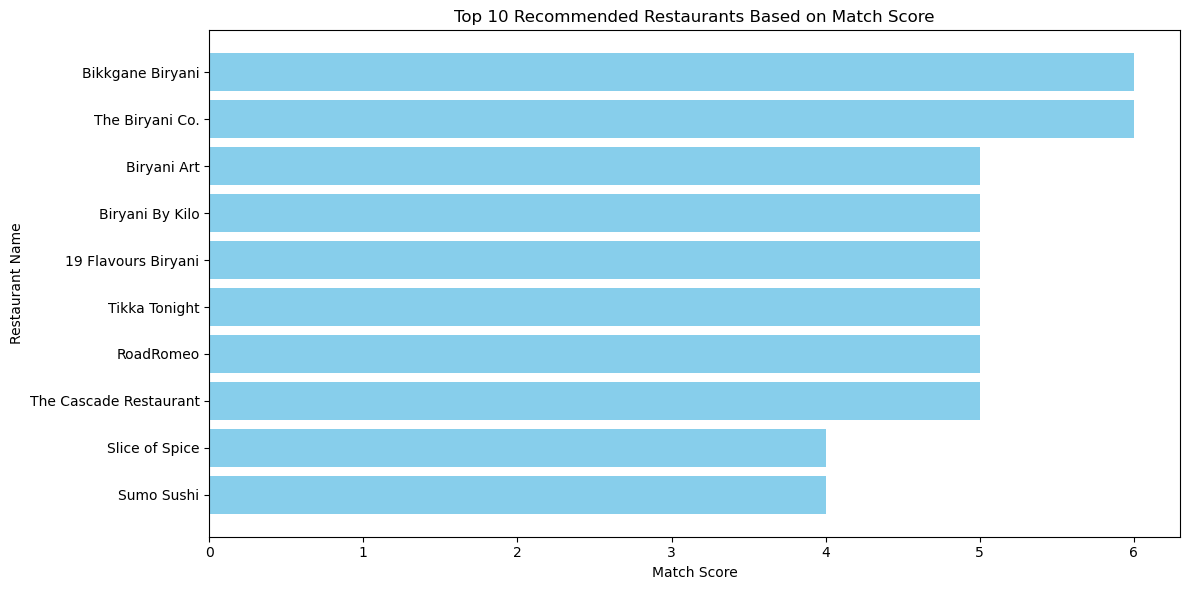

In [62]:
# Creating a bar plot for the match scores of recommended restaurants

recs_sorted['Restaurant Name'] = recs_sorted['Restaurant Name'].astype(str)

# Plotting
plt.figure(figsize = (12, 6))
plt.barh(recs_sorted['Restaurant Name'], recs_sorted['Match Score'], color = 'skyblue')
plt.xlabel('Match Score')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Recommended Restaurants Based on Match Score')
plt.gca().invert_yaxis()  # Highest score on top
plt.tight_layout()
plt.show()